# Лабораторная работа №1
## Выполнила: Пилипенко Елизавета
## Группа: ИДБ-22-13

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

# Загрузка данных
data = pd.read_csv("wifi_localization.txt", sep="\t", header=None)

# Название столбцов
columns = ["WiFi-Network-1", "WiFi-Network-2", "WiFi-Network-3", "WiFi-Network-4", 
           "WiFi-Network-5", "WiFi-Network-6", "WiFi-Network-7", "Room"]

# Переименование столбцов
data.columns = columns

# Разделение данных на обучающую и тестовую выборки
X = data.drop("Room", axis=1)
y = data["Room"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабирование данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred_logreg = logreg.predict(X_test)

# Вывод Classification Report и Confusion Matrix
print("Логистическая регрессия:")
print(classification_report(y_test, y_pred_logreg))


Логистическая регрессия:
              precision    recall  f1-score   support

           1       1.00      0.98      0.99       104
           2       0.98      0.93      0.95        95
           3       0.91      0.98      0.95        88
           4       0.99      1.00      1.00       113

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



In [7]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred_dtree = dtree.predict(X_test)

# Вывод Classification Report и Confusion Matrix
print("Дерево решений:")
print(classification_report(y_test, y_pred_dtree))

Дерево решений:
              precision    recall  f1-score   support

           1       0.98      1.00      0.99       104
           2       0.99      0.94      0.96        95
           3       0.93      0.98      0.96        88
           4       1.00      0.99      1.00       113

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400



In [8]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred_knn = knn.predict(X_test)

# Вывод Classification Report и Confusion Matrix
print("K-ближайших соседей:")
print(classification_report(y_test, y_pred_knn))

K-ближайших соседей:
              precision    recall  f1-score   support

           1       0.99      0.99      0.99       104
           2       0.98      0.94      0.96        95
           3       0.91      0.98      0.95        88
           4       1.00      0.98      0.99       113

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



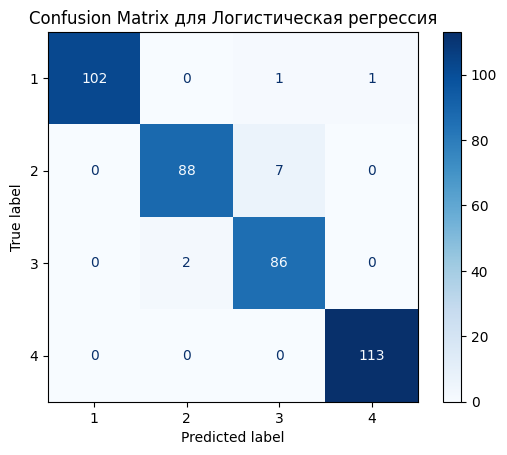

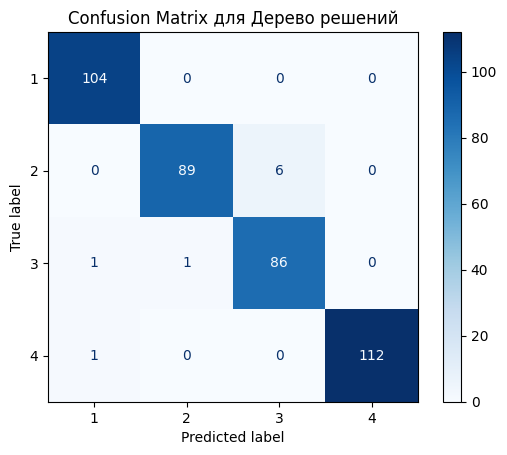

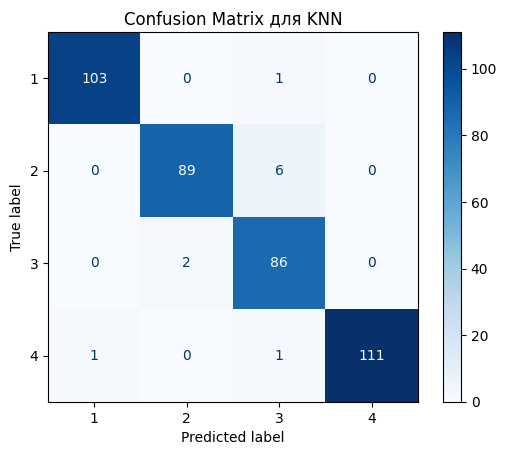

In [9]:
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

for model_name, y_pred in [("Логистическая регрессия", y_pred_logreg), 
                           ("Дерево решений", y_pred_dtree), 
                           ("KNN", y_pred_knn)]:
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix для {model_name}")
    plt.show()


In [20]:
# Подсчёт общего количества ошибок для каждой модели
logreg_errors = (y_test != y_pred_logreg).sum()
dtree_errors = (y_test != y_pred_dtree).sum()
knn_errors = (y_test != y_pred_knn).sum()

print(f"Общее количество ошибок для Логистической регрессии: {logreg_errors}")
print(f"Общее количество ошибок для Дерева решений: {dtree_errors}")
print(f"Общее количество ошибок для K-ближайших соседей: {knn_errors}")

# Подсчёт количества ошибок по каждой комнате
logreg_room_errors = y_test[y_test != pd.Series(y_pred_logreg, index=y_test.index)].value_counts()
dtree_room_errors = y_test[y_test != pd.Series(y_pred_dtree, index=y_test.index)].value_counts()
knn_room_errors = y_test[y_test != pd.Series(y_pred_knn, index=y_test.index)].value_counts()

# Объединение данных в общую таблицу
total_room_errors = pd.DataFrame({
    "Логистическая регрессия": logreg_room_errors,
    "Дерево решений": dtree_room_errors,
    "K-ближайших соседей": knn_room_errors
}).fillna(0).astype(int)

# Сумма ошибок по комнатам
total_room_errors["Сумма ошибок"] = total_room_errors.sum(axis=1)

# Вывод ошибок по каждой комнате
print("\nОшибки по комнатам для всех моделей:")
print(total_room_errors)

# Комнаты с минимальными и максимальными ошибками
min_error_room = total_room_errors["Сумма ошибок"].idxmin()
max_error_room = total_room_errors["Сумма ошибок"].idxmax()

print(f"\nКомната с наименьшим количеством ошибок: {min_error_room}")
print(f"Количество ошибок: {total_room_errors.loc[min_error_room, 'Сумма ошибок']}")

print(f"\nКомната с наибольшим количеством ошибок: {max_error_room}")
print(f"Количество ошибок: {total_room_errors.loc[max_error_room, 'Сумма ошибок']}")

# Сравнение схожести ошибок
logreg_indices = y_test[y_test != pd.Series(y_pred_logreg, index=y_test.index)].index
dtree_indices = y_test[y_test != pd.Series(y_pred_dtree, index=y_test.index)].index
knn_indices = y_test[y_test != pd.Series(y_pred_knn, index=y_test.index)].index

common_errors = set(logreg_indices).intersection(dtree_indices).intersection(knn_indices)
similarity_percentage = len(common_errors) / len(y_test) * 100

print(f"\nСхожесть ошибок между моделями: {similarity_percentage:.2f}%")


Общее количество ошибок для Логистической регрессии: 11
Общее количество ошибок для Дерева решений: 9
Общее количество ошибок для K-ближайших соседей: 11

Ошибки по комнатам для всех моделей:
      Логистическая регрессия  Дерево решений  K-ближайших соседей  \
Room                                                                 
1                           2               0                    1   
2                           7               6                    6   
3                           2               2                    2   
4                           0               1                    2   

      Сумма ошибок  
Room                
1                3  
2               19  
3                6  
4                3  

Комната с наименьшим количеством ошибок: 1
Количество ошибок: 3

Комната с наибольшим количеством ошибок: 2
Количество ошибок: 19

Схожесть ошибок между моделями: 0.50%


# Анализ результатов моделей
## Общие наблюдения:

Все три модели демонстрируют высокую точность (около 97%), что говорит о том, что они способны хорошо предсказывать номер комнаты по сигналам Wi-Fi. Все модели показывают сбалансированные показатели точности, полноты и F1-меры для всех классов комнат.Между моделями наблюдаются небольшие различия в точности, полноте и F1-мере, но в целом они демонстрируют сравнимую производительность.

### Логистическая регрессия:

Модель ошибается в предсказании 1 комнаты как 3 и 4. Также есть 1 ошибка в предсказании 3 комнаты как 2. Вероятно, это происходит из-за линейной природы модели, которая не всегда может идеально разделить нелинейные данные. Однако модель не ошибается в предсказании 4 комнаты, что говорит о том, что модель хорошо различает эту комнату от остальных.

### Дерево решений:

Модель ошибается в предсказании 2 комнаты как 3. Также есть ошибки в предсказании 3 комнаты как 1 и 2 и ошибка в предсказании 4 комнаты как 1. Ошибки могут быть связаны с переобучением модели, когда она слишком сильно адаптируется к обучающим данным и плохо обобщается на тестовые. Однако модель не ошибается в предсказании 1 комнаты, что отличает ее от логистической регрессии.

### K-ближайших соседей:

Модель ошибается в предсказании 1 комнаты как 3, 2 комнаты как 3, 3 комнаты как 2, 4 комнаты как 1 и 3. Ошибки могут быть связаны с выбором числа соседей (k). Также могут возникать ошибки, если точки данных в тестовой выборке находятся слишком далеко от обучающих точек.

### Сравнение ошибок:

Не все ошибки одинаковы. У каждой модели есть свои уникальные ошибки, но также есть несколько общих. Различия в ошибках связаны с различными принципами работы каждой модели: логистическая регрессия - линейная, дерево решений - иерархическое, KNN - основан на близости.

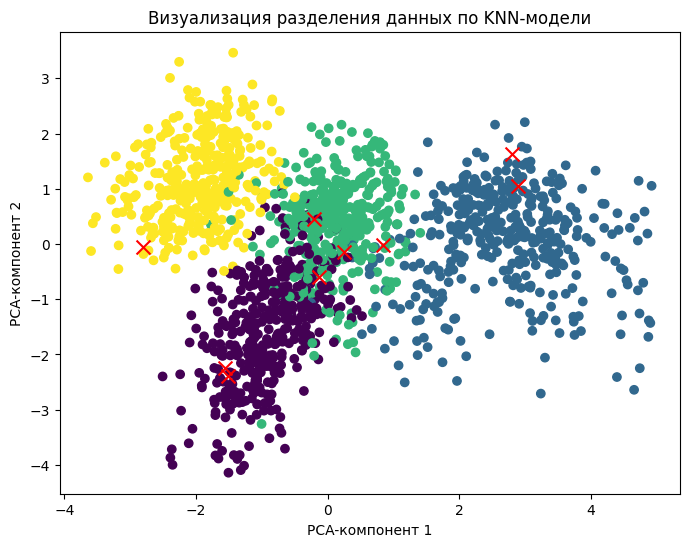

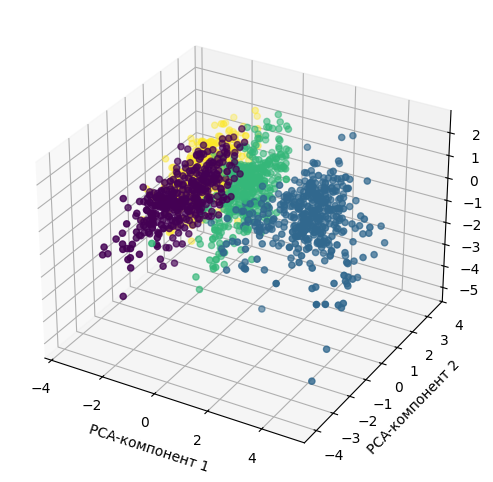

In [37]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# Визуализация разделения данных по KNN-модели
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap="viridis")
plt.title("Визуализация разделения данных по KNN-модели")
plt.xlabel("PCA-компонент 1")
plt.ylabel("PCA-компонент 2")

# Вывод границ разделения
for i in range(1, 10):
    # Выбор случайной точки для каждого класса
    X_test_point = pca.transform(X_test[i].reshape(1, -1))
    
    # Предсказание класса для этой точки
    predicted_class = knn.predict(X_test[i].reshape(1, -1))[0]
    
    # Нанесение точки на график
    plt.scatter(X_test_point[:, 0], X_test_point[:, 1], marker="x", color="red", s=100)

plt.show()

# Применение PCA для уменьшения размерности данных до 3
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train)

# Визуализация точек данных в 3D-пространстве
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(projection="3d")
ax.scatter(X_train_pca[:, 0], X_train_pca[:, 1], X_train_pca[:, 2], c=y_train, cmap="viridis")
ax.set_xlabel("PCA-компонент 1")
ax.set_ylabel("PCA-компонент 2")
ax.set_zlabel("PCA-компонент 3")
plt.show()

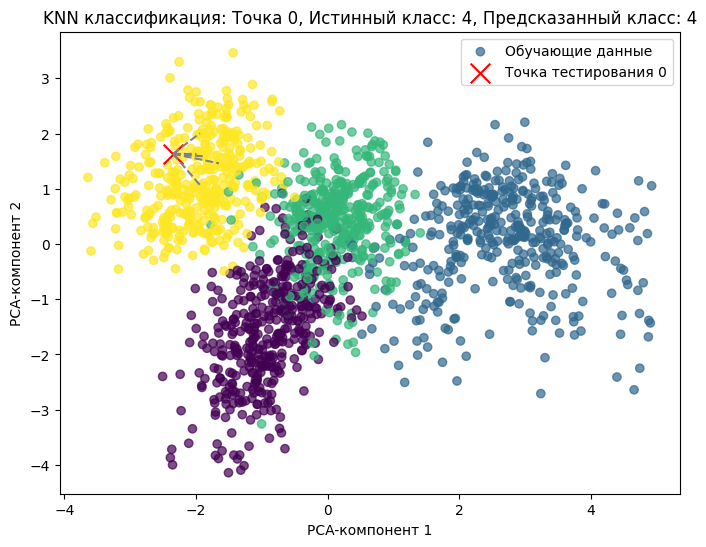

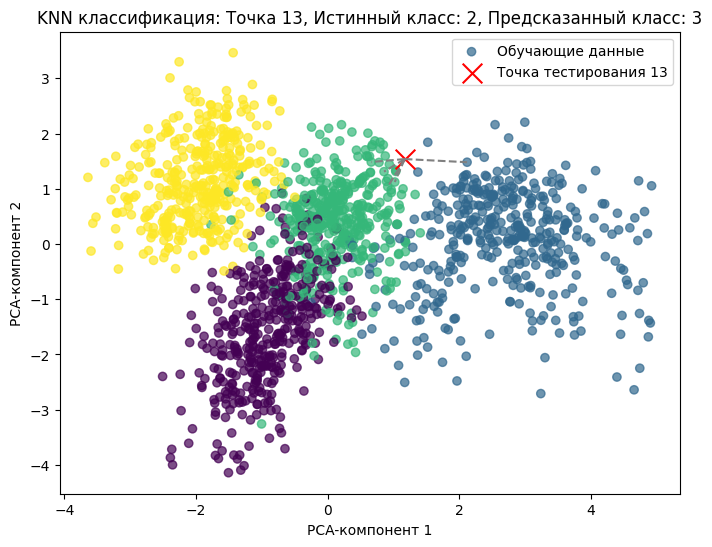

In [30]:
import numpy as np

def visualize_knn(X_train, y_train, X_test, y_test, y_pred, knn, index):
    pca = PCA(n_components=2)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    plt.figure(figsize=(8, 6))
    plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap="viridis", alpha=0.7, label="Обучающие данные")
    plt.scatter(X_test_pca[index, 0], X_test_pca[index, 1], marker='x', s=200, c='r', label=f"Точка тестирования {index}")

    neighbors = knn.kneighbors(X_test[index].reshape(1, -1), n_neighbors=5, return_distance=False)[0]
    for neighbor_index in neighbors:
        plt.plot([X_test_pca[index, 0], X_train_pca[neighbor_index, 0]], [X_test_pca[index, 1], X_train_pca[neighbor_index, 1]], color="gray", linestyle="--")  

    plt.title(f"KNN классификация: Точка {index}, Истинный класс: {y_test.iloc[index]}, Предсказанный класс: {y_pred[index]}")
    plt.xlabel("PCA-компонент 1")
    plt.ylabel("PCA-компонент 2")
    plt.legend()
    plt.show()
    
correct_indices = np.where(y_pred_knn == y_test)[0]
incorrect_indices = np.where(y_pred_knn != y_test)[0]

visualize_knn(X_train, y_train, X_test, y_test, y_pred_knn, knn, correct_indices[0])  #Успешный пример
visualize_knn(X_train, y_train, X_test, y_test, y_pred_knn, knn, incorrect_indices[0])  #Неудачный пример